#### **Exercise 1:**
Give students in the `example.csv` file a bonus of 5 for all the courses. Find a way to replace all the values that are now greater than 30 by 30. Save the new data to a file. Make a plot with histograms for every course in the example file.

In [13]:
#Give students in the example.csv file a bonus of 5 for all the courses. Find a way to replace all the values that are now greater than 30 by 30. Save the new data to a file. Make a plot with histograms for every course in the example file.

In [1]:
# import modules here 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 


In [9]:
# read the data 
it = pd.read_csv('data/example.csv', index_col=0)
print(it)
def add_bonus(x):
    return (x+5 if x+5 <= 30 else 30) 
it2 = it.map(add_bonus)
print(it2) 


        course1  course2  course3  course4
name                                      
Marie        24       18       30       20
John         18       27       29       27
Kati         21       24       28       27
Olaf         30       30       29       30
Mark         24       25       27       21
Olga         23       26       30       30
Jean         18       28       26       24
Alex         19       20       27       27
Pier         24       29       23       26
Bennet       24       25       26       30
Luis         20       20       18       18
        course1  course2  course3  course4
name                                      
Marie        29       23       30       25
John         23       30       30       30
Kati         26       29       30       30
Olaf         30       30       30       30
Mark         29       30       30       26
Olga         28       30       30       30
Jean         23       30       30       29
Alex         24       25       30       30
Pier       

In [10]:
it2.describe()

,course1,course2,course3,course4
count,11.000000,11.000000,11.000000,11.000000
mean,26.818182,28.363636,29.181818,28.454545
std,2.676497,2.656039,2.136267,2.544156
min,23.000000,23.000000,23.000000,23.000000
25%,24.500000,27.000000,30.000000,27.500000
50%,28.000000,30.000000,30.000000,30.000000
75%,29.000000,30.000000,30.000000,30.000000
max,30.000000,30.000000,30.000000,30.000000


In [11]:
it2.to_csv('data/example_mean.csv')

<Axes: ylabel='Frequency'>

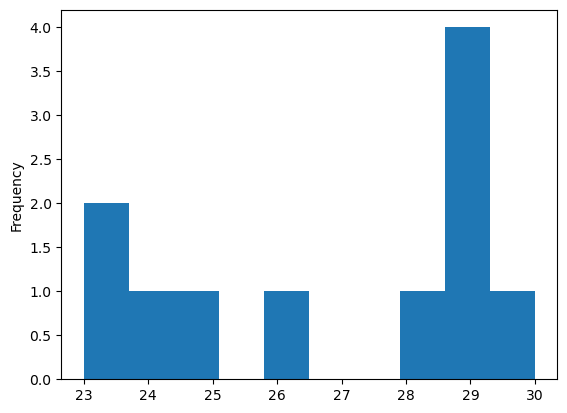

In [14]:
# making a histogram for each course 
it2["course1"].plot(kind = 'hist')

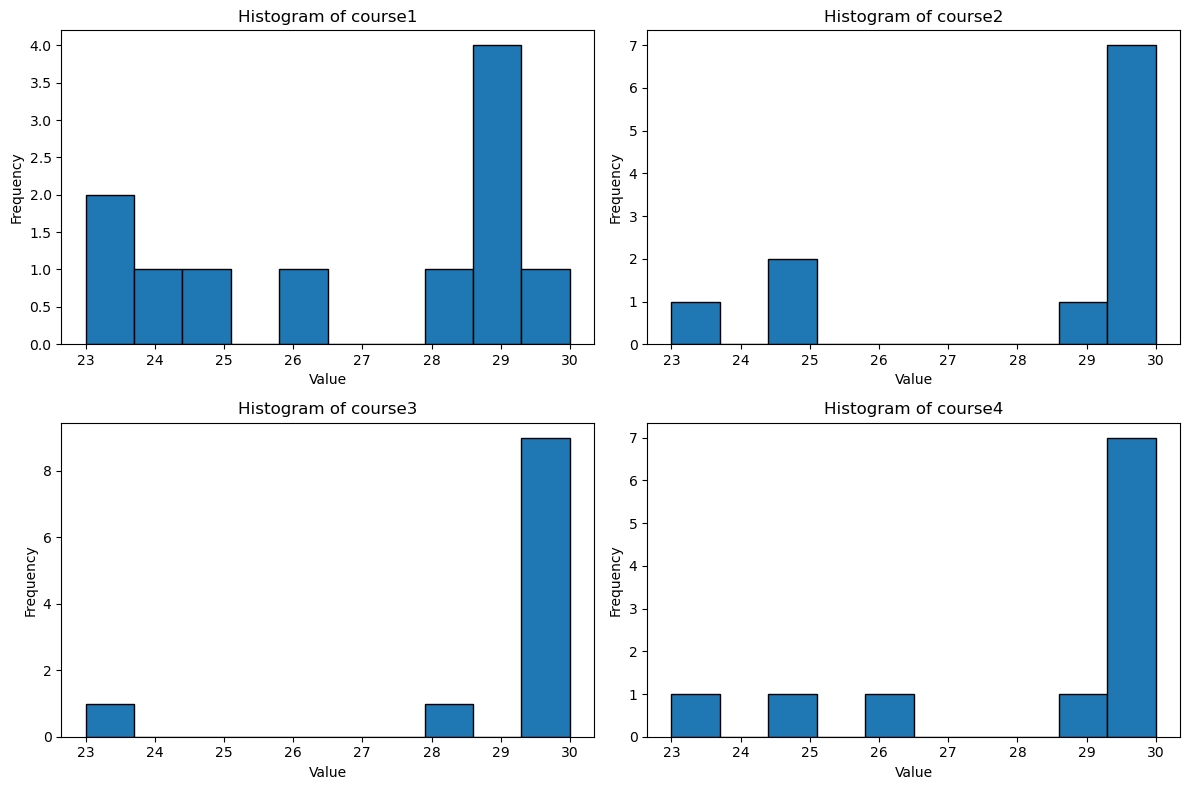

In [15]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

courses = ["course1", "course2", "course3", "course4"]

for i, course in enumerate(courses):
    ax = axes.flatten()[i]
    it2[course].plot(kind='hist', ax=ax, title=f'Histogram of {course}', edgecolor='black')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()


#### **Exercise 2:**

 - Read in the `cars.csv` file as a dataframe
 - Remove the row with the index 3, which contains a quote in the Model column.
 - Add a new column called Price with the following values: [8000, 6500, 7000, 6800, 7500, 7300, 7000, 9000, 6500, 7800]
 - Find the average Length of all the vehicles.
 - Find the median Price of all the vehicles.
 - Create a new dataframe that only contains the rows where the Price is greater than 7000.
 - Sort the dataframe in descending order by the Price column.


In [16]:
# read the file 2 
cr = pd.read_csv('data/cars.csv', index_col=0)
print(cr) 

           Make                        Model  Length
Year                                                
1997       Ford                         E350    2.34
2000    Mercury                       Cougar    2.38
1993  Chevrolet  Venture "Extended Edition"     3.20
1999       Jeep               Grand Cherokee    2.56
1998      Dodge                     Intrepid    3.01
1997       Ford                         E350    2.34
1999       Ford                         E350    2.34
1996       Ford                      Mustang    2.37
2000       Ford                      Mustang    2.34
1997       Ford                       Taurus    2.34


In [17]:
print(type(cr.index[2])) 

<class 'numpy.int64'>


In [19]:
cr2 = cr.drop(1993, axis='rows') 
print(cr2) 

         Make           Model  Length
Year                                 
1997     Ford            E350    2.34
2000  Mercury          Cougar    2.38
1999     Jeep  Grand Cherokee    2.56
1998    Dodge        Intrepid    3.01
1997     Ford            E350    2.34
1999     Ford            E350    2.34
1996     Ford         Mustang    2.37
2000     Ford         Mustang    2.34
1997     Ford          Taurus    2.34


In [24]:
prices_list = [8000, 6500, 7000, 6800, 7500, 7300, 7000, 9000, 6500]
cr2['Prices'] = prices_list
print(cr2)

         Make           Model  Length  Prices
Year                                         
1997     Ford            E350    2.34    8000
2000  Mercury          Cougar    2.38    6500
1999     Jeep  Grand Cherokee    2.56    7000
1998    Dodge        Intrepid    3.01    6800
1997     Ford            E350    2.34    7500
1999     Ford            E350    2.34    7300
1996     Ford         Mustang    2.37    7000
2000     Ford         Mustang    2.34    9000
1997     Ford          Taurus    2.34    6500


In [28]:
# evaluate the averge lenth of all the vehicle 
mean_len = cr2["Length"].mean()
print(f"The mean of the car length is: {mean_len}")

The mean of the car length is: 2.4466666666666668


In [26]:
# meadian price of the vehicle 
median_price = cr2["Prices"].median()
print(f"The median price is: {median_price}")

The median price is: 7000.0


In [32]:
# Create a new DataFrame based on the condition
exp_cr = cr2.loc[cr2['Prices'] >= 7000]
print(exp_cr)

      Make           Model  Length  Prices
Year                                      
1997  Ford            E350    2.34    8000
1999  Jeep  Grand Cherokee    2.56    7000
1997  Ford            E350    2.34    7500
1999  Ford            E350    2.34    7300
1996  Ford         Mustang    2.37    7000
2000  Ford         Mustang    2.34    9000


In [33]:
#Sort the dataframe in descending order by the Price column.
exp_cr.sort_values(by=['Prices'], inplace=True, ascending=False)
print(exp_cr)

      Make           Model  Length  Prices
Year                                      
2000  Ford         Mustang    2.34    9000
1997  Ford            E350    2.34    8000
1997  Ford            E350    2.34    7500
1999  Ford            E350    2.34    7300
1999  Jeep  Grand Cherokee    2.56    7000
1996  Ford         Mustang    2.37    7000


C:\Users\danie\AppData\Local\Temp\ipykernel_17856\2912018289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_cr.sort_values(by=['Prices'], inplace=True, ascending=False)


<Axes: ylabel='Frequency'>

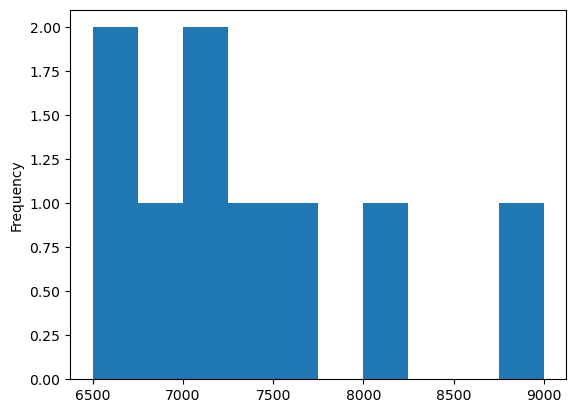

In [41]:
# making a histogram for each course 
cr2["Prices"].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

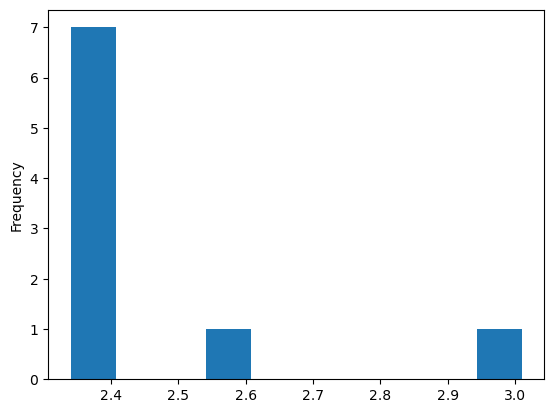

In [42]:
cr2["Length"].plot(kind = 'hist')

#### **Exercise 3:**
 - create a random matrix with numpy
 - save it to file
 - read it back with numpy
 - calculate some statistcs on it with numpy 
 - read the same file with pandas
 - calculate the same statistics on it with pandas

In [56]:
# random matrix 
matrix_floats = np.random.randint(1, 100, size = (100, 4))
print(matrix_floats) 

[[44  3  8 39]
 [39 16 71 21]
 [ 4 36 25 81]
 [36 58 34  1]
 [15 63 87 67]
 [98 36 84 16]
 [75 36 58 48]
 [95 98 28 69]
 [94  2  9 23]
 [86 59 95 68]
 [48 50  7 75]
 [33 88 49 32]
 [ 5 53 19 83]
 [25 97 21 32]
 [66  2 80 75]
 [ 8 14 46 25]
 [11 59 46 98]
 [20 37 72 52]
 [86  3 44 46]
 [43 61 71 53]
 [81 34  7 45]
 [77 40  9 69]
 [10 60  4 95]
 [54 72 92 41]
 [13 92 59 74]
 [38 52 13 89]
 [ 1 87 86 49]
 [65  5 46  5]
 [48 43 36 75]
 [99 65  9 87]
 [59 44 77 29]
 [32 86 56 41]
 [15 70 60 46]
 [39 52 10 58]
 [95 53 86 15]
 [57 87 91 26]
 [23 11 89 50]
 [ 6 84 50 86]
 [92 23 17 39]
 [91 71 74 34]
 [51 97  7 42]
 [75 47 76 82]
 [73 80 39 76]
 [30 23 74 96]
 [98 24 36 17]
 [89 25 69 45]
 [65  4 19 69]
 [92 66 97 27]
 [30 85 47 84]
 [18 95 59 71]
 [31 75 64  4]
 [48 29 41 62]
 [15 83 97 21]
 [94 82 78 13]
 [93 56 58 88]
 [19 74 76 61]
 [48 90 82  3]
 [51 18 30 33]
 [79 29 56 89]
 [ 6 25 57 46]
 [37 65 14 40]
 [19 24 95 79]
 [94  9 98  2]
 [65 21 73 70]
 [99 79 80  1]
 [91 74 77  3]
 [62 96 94

In [57]:
# save to a file 
np.savetxt("data/data_mat.txt",matrix_floats, fmt='%d') 

In [58]:
# read with numpy 
nam_dat =np.genfromtxt('data/data_mat.txt', dtype = float)
print(nam_dat) 

[[44.  3.  8. 39.]
 [39. 16. 71. 21.]
 [ 4. 36. 25. 81.]
 [36. 58. 34.  1.]
 [15. 63. 87. 67.]
 [98. 36. 84. 16.]
 [75. 36. 58. 48.]
 [95. 98. 28. 69.]
 [94.  2.  9. 23.]
 [86. 59. 95. 68.]
 [48. 50.  7. 75.]
 [33. 88. 49. 32.]
 [ 5. 53. 19. 83.]
 [25. 97. 21. 32.]
 [66.  2. 80. 75.]
 [ 8. 14. 46. 25.]
 [11. 59. 46. 98.]
 [20. 37. 72. 52.]
 [86.  3. 44. 46.]
 [43. 61. 71. 53.]
 [81. 34.  7. 45.]
 [77. 40.  9. 69.]
 [10. 60.  4. 95.]
 [54. 72. 92. 41.]
 [13. 92. 59. 74.]
 [38. 52. 13. 89.]
 [ 1. 87. 86. 49.]
 [65.  5. 46.  5.]
 [48. 43. 36. 75.]
 [99. 65.  9. 87.]
 [59. 44. 77. 29.]
 [32. 86. 56. 41.]
 [15. 70. 60. 46.]
 [39. 52. 10. 58.]
 [95. 53. 86. 15.]
 [57. 87. 91. 26.]
 [23. 11. 89. 50.]
 [ 6. 84. 50. 86.]
 [92. 23. 17. 39.]
 [91. 71. 74. 34.]
 [51. 97.  7. 42.]
 [75. 47. 76. 82.]
 [73. 80. 39. 76.]
 [30. 23. 74. 96.]
 [98. 24. 36. 17.]
 [89. 25. 69. 45.]
 [65.  4. 19. 69.]
 [92. 66. 97. 27.]
 [30. 85. 47. 84.]
 [18. 95. 59. 71.]
 [31. 75. 64.  4.]
 [48. 29. 41. 62.]
 [15. 83. 97

In [65]:
# read the data with pandas 
df = pd.read_csv('data/data_mat.txt', sep=' ', header = None)
print(df) 

     0   1   2   3
0   44   3   8  39
1   39  16  71  21
2    4  36  25  81
3   36  58  34   1
4   15  63  87  67
..  ..  ..  ..  ..
95  66  28  94  89
96  99  63  69  92
97  88  47  16   8
98  82   9  24  91
99  72  40  45  71

[100 rows x 4 columns]


In [69]:
# calculate some statistics 
# read with numpy 
nam_dat =np.genfromtxt('data/data_mat.txt', dtype = float)
#print(nam_dat) 
total_sum = np.sum(nam_dat)

mean_val = np.mean(nam_dat)

std_val = np.std(nam_dat)

min_val = np.min(nam_dat)
max_val = np.max(nam_dat)


In [70]:
print(total_sum) 
print(mean_val)
print(std_val)
print(min_val)
print(max_val) 

20482.0
51.205
28.928065524676892
1.0
99.0
